In [1]:
import pandas as pd
import numpy as np
import regex as re
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import pickle

import matplotlib.pyplot as plt


In [14]:
import seaborn as sns
from sklearn.model_selection import train_test_split


In [30]:
%config InlineBackend.figure_format = 'retina'

In [31]:
import warnings
warnings.filterwarnings('ignore')

# Read data set

In [3]:
file_path = "../DataSet/"
file_name = "exercise_40_train.csv"
df = pd.read_csv(file_path+file_name)

In [4]:
df.shape

(40000, 101)

Check the column names and details as follow.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 101 entries, y to x100
dtypes: float64(86), int64(3), object(12)
memory usage: 30.8+ MB


In [6]:
df.head()

y        x1         x2        x3        x4        x5        x6        x7  \
0  0  0.165254  18.060003       Wed  1.077380 -1.339233 -1.584341   0.0062%   
1  1  2.441471  18.416307    Friday  1.482586  0.920817 -0.759931   0.0064%   
2  1  4.427278  19.188092  Thursday  0.145652  0.366093  0.709962   -8e-04%   
3  0  3.925235  19.901257   Tuesday  1.763602 -0.251926 -0.827461  -0.0057%   
4  0  2.868802  22.202473    Sunday  3.405119  0.083162  1.381504   0.0109%   

         x8        x9  ...       x91       x92  x93       x94       x95  \
0  0.220784  1.816481  ... -0.397427  0.909479   no  5.492487       NaN   
1  1.192441  3.513950  ...  0.656651  9.093466   no  3.346429  4.321172   
2  0.952323  0.782974  ...  2.059615  0.305170   no  4.456565       NaN   
3 -0.520756  1.825586  ...  0.899392  5.971782   no  4.100022  1.151085   
4 -0.732739  2.151990  ...  3.003595  1.046096  yes  3.234033  2.074927   

         x96        x97  x98  x99        x100  
0  10.255579   7.627730    0  yes  104.251338  
1        NaN  10.505284    1  yes  101.230645  
2   8.754572   7.810979    0  yes  109.345215  
3        NaN   9.178325    1  yes  103.021970  
4   9.987006  11.702664    0  yes   92.925935  

[5 rows x 101 columns]

# Check out data for duplicates


In [12]:
# calculate duplicates
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())
# # list all duplicate rows
# print(df[dups])

False


No duplicates found

# Train Test split

In [18]:
# split into inpiut and output elements
X = df.drop(['y'], axis=1)
y = df['y']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# summarize the shape of the training dataset
print('Train set ', X_train.shape, y_train.shape)
print('Test set ', X_test.shape, y_test.shape)

Train set  (28000, 100) (28000,)
Test set  (12000, 100) (12000,)


In [7]:
df.dtypes.value_counts()

float64    86
object     12
int64       3
dtype: int64

there are 3 types of data in the data set

# Check out the object columns, number of uniques and number of NaNs

In [38]:
columns_obj_dtype = []
for col in df.columns:
    if df[col].dtypes == 'object':
        columns_obj_dtype.append(col)
print('columns_obj_dtype = ', columns_obj_dtype)

print(100*'=')


number_of_Obj_cols_with_nan = 0
columns_obj_dtype_NaN = []


for col in columns_obj_dtype:
    if df[col].isnull().sum() != 0:
        number_of_Obj_cols_with_nan = number_of_Obj_cols_with_nan + 1
        
        columns_obj_dtype_NaN.append(col)
        
        print('number of NaNs in ', col, '=', (df[col].isnull().sum())*100/(df.shape[0]), '%',
              '\nNumber of uniqs =', df[col].nunique(), '\n')
print('number_of_Obj_cols_with_nan ', number_of_Obj_cols_with_nan)

columns_obj_dtype =  ['x3', 'x7', 'x19', 'x24', 'x31', 'x33', 'x39', 'x60', 'x65', 'x77', 'x93', 'x99']
number of NaNs in  x24 = 9.64 % 
Number of uniqs = 2 

number of NaNs in  x33 = 17.9275 % 
Number of uniqs = 51 

number of NaNs in  x77 = 23.1425 % 
Number of uniqs = 7 

number of NaNs in  x99 = 32.09 % 
Number of uniqs = 1 

number_of_Obj_cols_with_nan  4


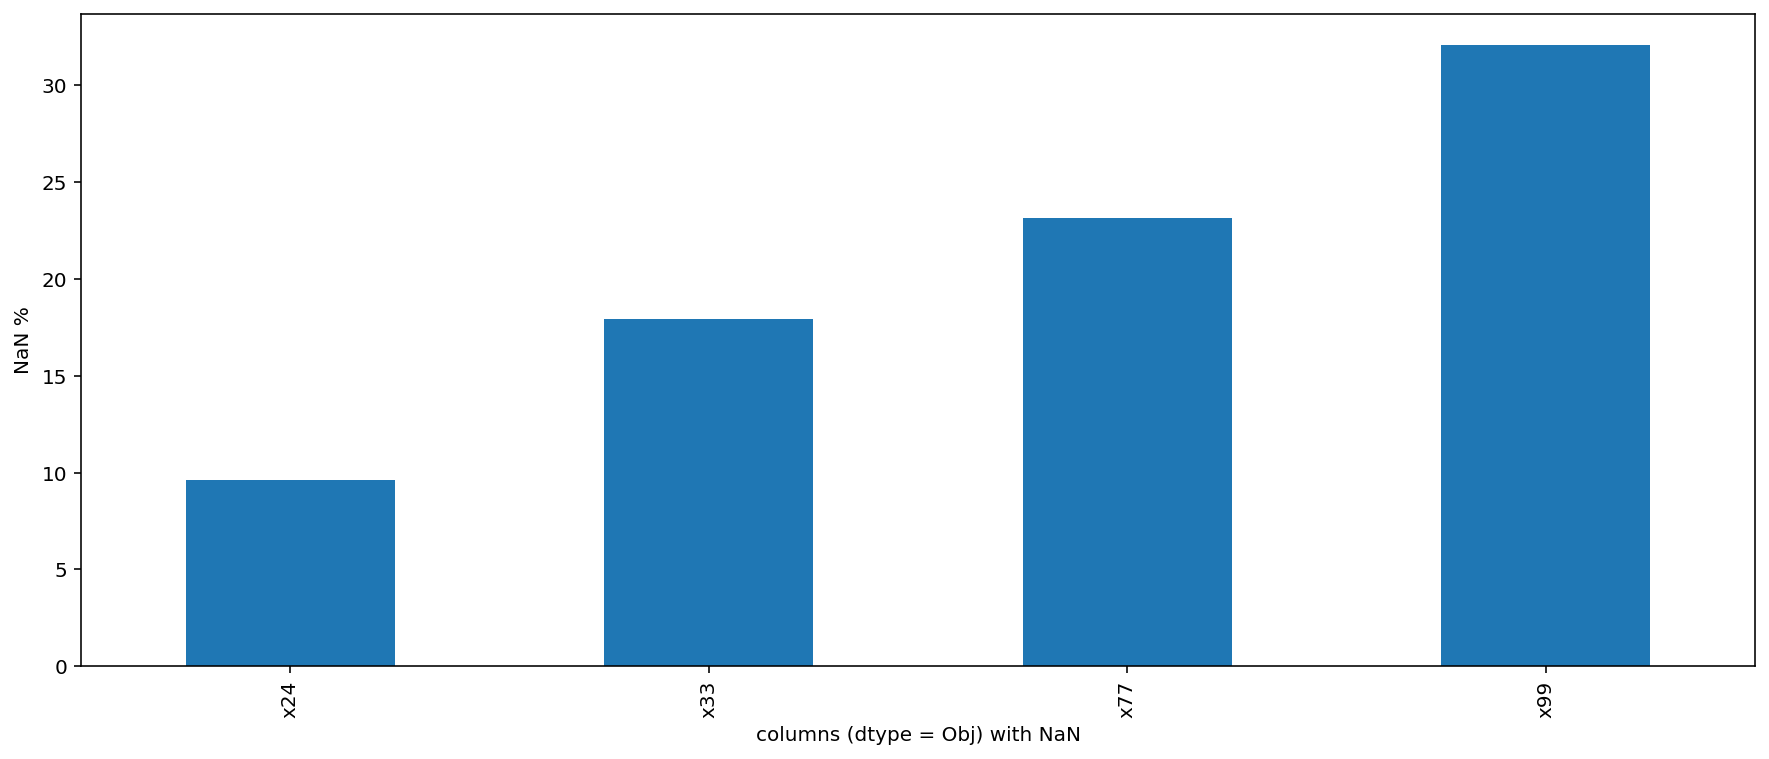

In [40]:
(df[columns_obj_dtype_NaN].isnull().sum()*100/(df.shape[0])).plot(kind='bar',figsize=(15,6))
plt.xlabel('columns (dtype = Obj) with NaN')
plt.ylabel('NaN %')
plt.show()

replace the NaN values with the mode for categorical values

In [60]:
import numpy as np
from sklearn.impute import 


ImportError: cannot import name '_deprecate_positional_args' from 'sklearn.utils.validation' (/Users/amin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py)

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[1, 2], [np.nan, 3], [7, 6]])

Check out the numerics columns, number of uniques and number of NaNs

In [59]:
columns_numeric_dtype = []
for col in df.columns:
    if df[col].dtypes == 'float64' or df[col].dtypes == 'int64':
        columns_numeric_dtype.append(col)
print('columns_numeric_dtype = ', columns_numeric_dtype)

print(100*'=')

# check the object columns uniqueness

number_of_numeric_cols_with_nan = 0

columns_numeric_dtype_NaN = []
for col in columns_numeric_dtype:
    if df[col].isnull().sum() != 0:
        number_of_numeric_cols_with_nan = number_of_numeric_cols_with_nan+1
        columns_numeric_dtype_NaN.append(col)
        print('number of NaNs in', col, '=', df[col].isnull().sum()*100/(df.shape[0]), '%')#, 'var = ', df[col].var())
        
print('\nnumber_of_numeric_cols_with_nan ', number_of_numeric_cols_with_nan)

columns_numeric_dtype =  ['y', 'x1', 'x2', 'x4', 'x5', 'x6', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x20', 'x21', 'x22', 'x23', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x32', 'x34', 'x35', 'x36', 'x37', 'x38', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x61', 'x62', 'x63', 'x64', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x94', 'x95', 'x96', 'x97', 'x98', 'x100']
number of NaNs in x5 = 6.07 %
number of NaNs in x11 = 12.775 %
number of NaNs in x14 = 24.66 %
number of NaNs in x16 = 28.03 %
number of NaNs in x22 = 5.9675 %
number of NaNs in x26 = 6.0825 %
number of NaNs in x30 = 80.84 %
number of NaNs in x38 = 6.005 %
number of NaNs in x41 = 23.7575 %
number of NaNs in x42 = 24.3225 %
number of NaNs in x44 = 85.6175 %


we do have 4 columns containing NaN with obj dtype and 38 columns containing NaN with numeric dtype

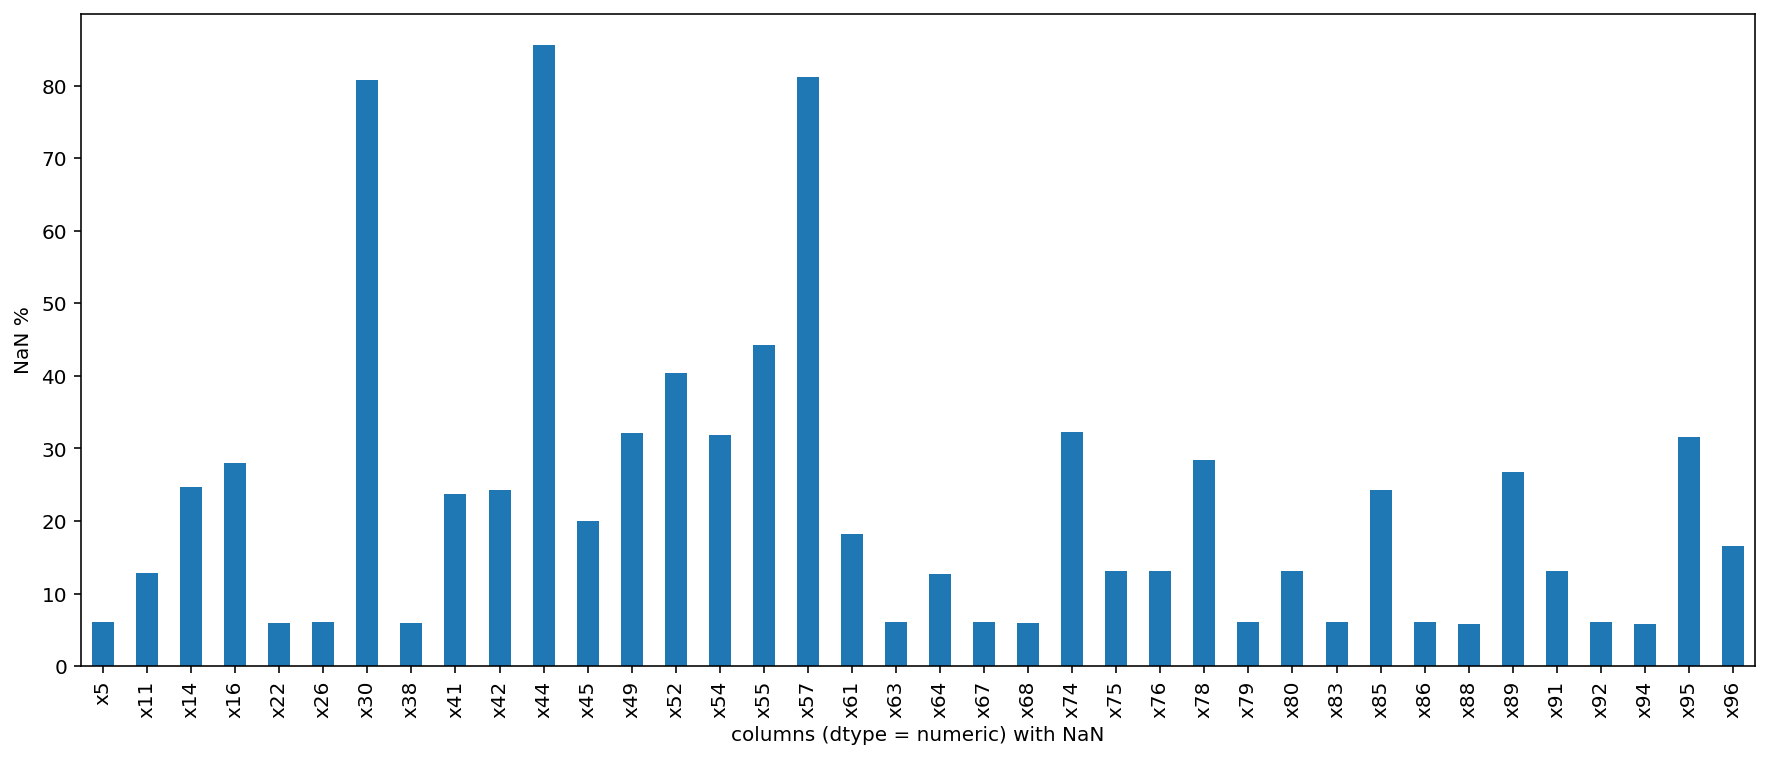

In [58]:
(df[columns_numeric_dtype_NaN].isnull().sum()*100/(df.shape[0])).plot(kind='bar',figsize=(15,6))
plt.xlabel('columns (dtype = numeric) with NaN')
plt.ylabel('NaN %')
plt.show()

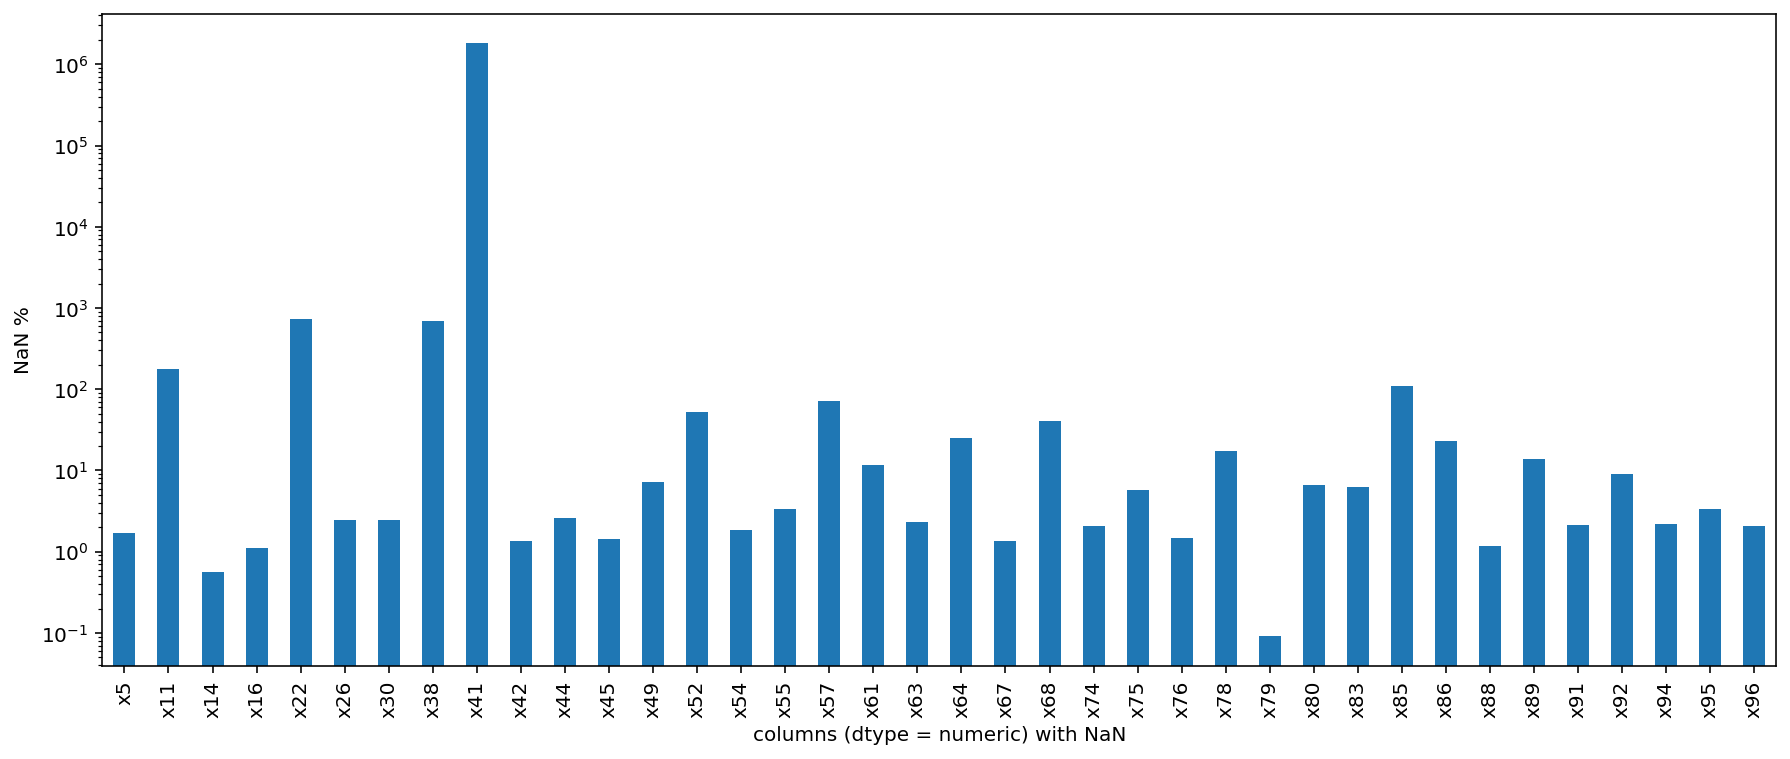

In [46]:
(df[columns_numeric_dtype_NaN].var()).plot(kind='bar',figsize=(15,6), log=True)
plt.xlabel('columns (dtype = numeric) with NaN')
plt.ylabel('NaN %')
plt.show()

# checking out the features variances and drop them based on the column variances.

In [ ]:
# define thresholds to check
thresholds = np.arange(0.0, 1000, 100)
# apply transform with each threshold
results = list()
for t in thresholds:
    # define the transform
    transform = VarianceThreshold(threshold=t)
    # transform the input data
    X_sel = transform.fit_transform(X_train_trans_df)
    # determine the number of input features
    n_features = X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    # store the result
    results.append(n_features)
# plot the threshold vs the number of selected features
plt.plot(thresholds, results, 'ro-')
plt.xlabel('VarianceThreshold')
plt.ylabel('Number of features')
plt.ylim(0,5)
plt.savefig('../Figures/Supervise_Sub_Project_f1.png')
plt.show()

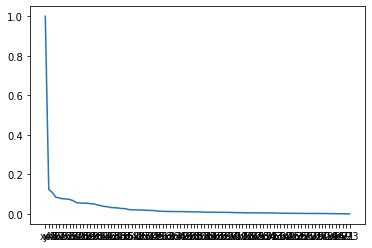

In [104]:
df_corr[['y']].sort_values(by=['y'], ascending=False).plot(kind='barh')
plt.show()

In [96]:
# df_corr = df.corr().abs()

# #plt.figure(figsize=(6,6))
# plt.figure(figsize=(6,40))
# sns.heatmap(df_corr[['y']].sort_values(by=['y'],ascending=False),
# #             vmin=0,
#             cmap='Blues',
#             annot=True);
# # plt.savefig("../Figures/" + section_fig_main_title +"plt1_corr_1.png")
# plt.show()

# Check out the dtypes in data frame

## Check out columns unique values percentage


In [65]:
uniq_index = list(df.nunique().index)
uniq_values = list(df.nunique())
num_rows = df.shape[0]

uniq_percent = [(val*100)/num_rows for val in uniq_values]
for i, uniq in enumerate(uniq_percent):
    print(uniq_index[i])
    print(round(uniq, 4))

y
0.005
x1
99.71
x2
99.6225
x3
0.035
x4
99.6225
x5
93.535
x6
99.635
x7
1.6575
x8
99.605
x9
99.6775
x10
99.4425
x11
87.1975
x12
99.8325
x13
99.7825
x14
74.86
x15
99.5925
x16
71.575
x17
99.755
x18
99.925
x19
100.0
x20
99.8375
x21
100.0
x22
94.005
x23
99.4175
x24
0.005
x25
99.7675
x26
93.5575
x27
99.99
x28
99.8575
x29
99.535
x30
19.15
x31
0.005
x32
99.595
x33
0.1275
x34
99.905
x35
99.58
x36
99.86
x37
99.84
x38
93.9625
x39
0.0025
x40
99.7575
x41
76.2425
x42
75.4025
x43
99.4025
x44
14.3725
x45
79.68
x46
99.705
x47
99.8575
x48
99.905
x49
67.865
x50
99.9975
x51
99.625
x52
59.505
x53
99.8875
x54
68.0325
x55
55.6625
x56
99.6525
x57
18.84
x58
10.625
x59
0.005
x60
0.03
x61
81.65
x62
99.74
x63
93.6575
x64
87.1625
x65
0.0125
x66
99.6075
x67
7.3025
x68
93.9625
x69
99.595
x70
95.1325
x71
7.67
x72
99.895
x73
99.915
x74
67.57
x75
86.625
x76
86.5125
x77
0.0175
x78
71.5
x79
0.005
x80
86.6975
x81
99.6125
x82
99.7025
x83
93.7075
x84
9.67
x85
75.6825
x86
93.87
x87
99.5725
x88
93.75
x89
73.165
x90
99.5275
x9

keep object columns names and count the number of null values

In [36]:
# df[columns_obj_dtype].isnull().sum()

In [35]:
# df[df['x24'].isnull()]

Drop object columns with null values. 

I keep the column names that I wannt to keep (with no null values).

In [31]:
dtype_obj_cols_to_keep = []
for col in columns_obj_dtype:
    if df[col].isnull().sum() == 0:
        dtype_obj_cols_to_keep.append(col)
print('dtype_obj_cols_to_keep = ', dtype_obj_cols_to_keep)

dtype_obj_cols_to_keep =  ['x3', 'x7', 'x19', 'x31', 'x39', 'x60', 'x65', 'x93']


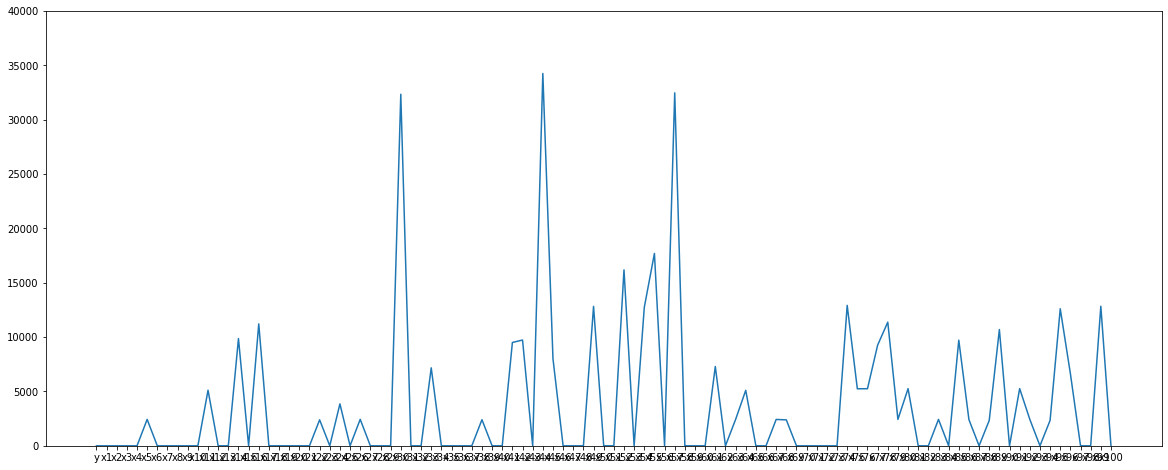

In [6]:
plt.figure(figsize=(20,8))
plt.plot(df.isnull().sum())
plt.ylim(0, df.shape[0])
plt.show()

## Keep columns that have less than 50% nulls

In [7]:
df.shape

(40000, 101)

In [8]:
cnt = 0
keep_cols = []
for col in df.columns:
    if df[col].isnull().sum() < 0.5*(df.shape[0]):
        cnt = cnt + 1
        keep_cols.append(col)
#         print(col)

print('number of columns to keep =',cnt)

number of columns to keep = 98


In [9]:
df_keep_cols = df[keep_cols]
df_keep_cols.shape

(40000, 98)

In [10]:
cnt = 0
for col in df_keep_cols.columns:
    if df_keep_cols[col].isnull().sum() > 0:
        cnt = cnt + 1

print('number of columns with null values =', cnt)

number of columns with null values = 39


In [11]:
# Replace the missed values with mean 

column_means = df_keep_cols.mean()
df_keep_cols_fillna_mean = df_keep_cols.fillna(column_means)

In [15]:
df_keep_cols.head()

y        x1         x2        x3        x4        x5        x6        x7  \
0  0  0.165254  18.060003       Wed  1.077380 -1.339233 -1.584341   0.0062%   
1  1  2.441471  18.416307    Friday  1.482586  0.920817 -0.759931   0.0064%   
2  1  4.427278  19.188092  Thursday  0.145652  0.366093  0.709962   -8e-04%   
3  0  3.925235  19.901257   Tuesday  1.763602 -0.251926 -0.827461  -0.0057%   
4  0  2.868802  22.202473    Sunday  3.405119  0.083162  1.381504   0.0109%   

         x8        x9  ...       x91       x92  x93       x94       x95  \
0  0.220784  1.816481  ... -0.397427  0.909479   no  5.492487       NaN   
1  1.192441  3.513950  ...  0.656651  9.093466   no  3.346429  4.321172   
2  0.952323  0.782974  ...  2.059615  0.305170   no  4.456565       NaN   
3 -0.520756  1.825586  ...  0.899392  5.971782   no  4.100022  1.151085   
4 -0.732739  2.151990  ...  3.003595  1.046096  yes  3.234033  2.074927   

         x96        x97  x98  x99        x100  
0  10.255579   7.627730    0  yes  104.251338  
1        NaN  10.505284    1  yes  101.230645  
2   8.754572   7.810979    0  yes  109.345215  
3        NaN   9.178325    1  yes  103.021970  
4   9.987006  11.702664    0  yes   92.925935  

[5 rows x 98 columns]

In [12]:
df_keep_cols_fillna_mean.isnull().sum()

y           0
x1          0
x2          0
x3          0
x4          0
        ...  
x96         0
x97         0
x98         0
x99     12836
x100        0
Length: 98, dtype: int64

In [13]:
cnt = 0
for col in df_keep_cols_fillna_mean.columns:
    if df_keep_cols_fillna_mean[col].isnull().sum() > 0:
        cnt = cnt + 1

print('number of columns with null values =',cnt)

number of columns with null values = 4
